In [85]:
import pandas as pd
import numpy as np
import os
import cv2

import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
%matplotlib inline

from sklearn.model_selection import train_test_split

In [163]:
# Preparing image data
def load_data(data_dir='images'):
    """
    Creates training and testing data for CNN
    :data_dir: path to image folder
    """
    X = []
    y = []
    
    for image_file in os.listdir(data_dir + '/potato'):
        img = Image.open(data_dir + '/potato/' + image_file).resize((128,128))
        X.append(np.array(img))
        y.append(1)
    
    for image_file in os.listdir(data_dir + '/stephanie'):
        img = Image.open(data_dir + '/stephanie/' + image_file).resize((128,128))
        X.append(np.array(img))
        y.append(0)
        
    X,y = np.array(X)/255,np.array(y)
    return train_test_split(X, y, test_size=0.20)

In [164]:
X_train, X_test, y_train, y_test = load_data()

In [165]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14, 128, 128, 3)
(14,)
(4, 128, 128, 3)
(4,)


## Building the Model

In [166]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [167]:
image_shape = (128,128,3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [168]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
__________

In [169]:
model.fit(X_train,y_train,
          epochs=15,
          validation_data=(X_test,y_test))

Train on 14 samples, validate on 4 samples
Epoch 1/15
14/14 [==============================]14/14 [==============================] - 2s 151ms/step - loss: 0.6976 - acc: 0.5000 - val_loss: 0.6353 - val_acc: 1.0000

Epoch 2/15
14/14 [==============================]14/14 [==============================] - 1s 95ms/step - loss: 0.6564 - acc: 0.5714 - val_loss: 0.5933 - val_acc: 1.0000

Epoch 3/15
14/14 [==============================]14/14 [==============================] - 1s 92ms/step - loss: 0.5797 - acc: 0.8571 - val_loss: 0.3785 - val_acc: 0.7500

Epoch 4/15
14/14 [==============================]14/14 [==============================] - 1s 95ms/step - loss: 0.7098 - acc: 0.6429 - val_loss: 0.3962 - val_acc: 1.0000

Epoch 5/15
14/14 [==============================]14/14 [==============================] - 2s 109ms/step - loss: 0.4753 - acc: 0.7857 - val_loss: 0.5851 - val_acc: 0.7500

Epoch 6/15
14/14 [==============================]14/14 [==============================] - 1s 94ms/step - 

## Evaluating Model Performance

In [176]:
model.evaluate(X_train, y_train)

14/14 [==============================]14/14 [==============================] - 0s 30ms/step



[0.015639880672097206, 1.0]

## Testing Model on new images

In [198]:
img = Image.open('potato.jpeg').resize((128,128))
potato = np.array(img)

In [199]:
potato = np.expand_dims(potato, axis=0)

In [222]:
model.predict(potato).flatten()[0]

1.0

In [214]:
res = model.predict(potato)

In [223]:
res[0][0] == 1

True

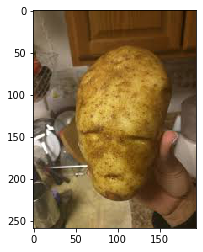

In [226]:
plt.imshow(imread('potato.jpeg'))

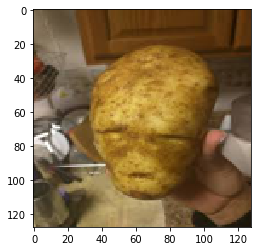

In [205]:
plt.imshow(img)

## Saving Model

In [207]:
model.save('potato_detector.h5')

In [210]:
from tensorflow.python.keras.models import load_model
model2 = load_model('potato_detector.h5')

In [211]:
model2

In [212]:
model